## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# 设置pandas显示选项，以便查看更多数据行和列
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

AttributeError: module 'numba' has no attribute 'generated_jit'

In [3]:
# 读取数据集
data = pd.read_csv("github_bot_processed_data.csv")
# 使用head()方法查看数据的前几行
print("数据的前几行：")
print(data.head())

# 使用info()方法查看每列的数据类型
print("\n每列的数据类型：")
print(data.info())

# 使用describe()方法生成数据的描述性统计信息
print("\n数据的描述性统计信息：")
print(data.describe())

数据的前几行：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6 

In [11]:
# 数据中有一列名为'created_at'，格式为字符串，转换为日期格式并格式化显示
if 'created_at' in data.columns:
    data['created_at'] = pd.to_datetime(data['created_at'])
    data['created_at'] = data['created_at'].dt.strftime('%Y-%m-%d')

In [8]:
# 对指定列进行对数变换

data = data[data['public_repos']!= 0]
data = data[data['public_gists']!= 0]
data = data[data['followers']!= 0]
data = data[data['following']!= 0]

data['log_public_repos'] = np.log(data['public_repos'])
data['log_public_gists'] = np.log(data['public_gists'])
data['log_followers'] = np.log(data['followers'])
data['log_following'] = np.log(data['following'])

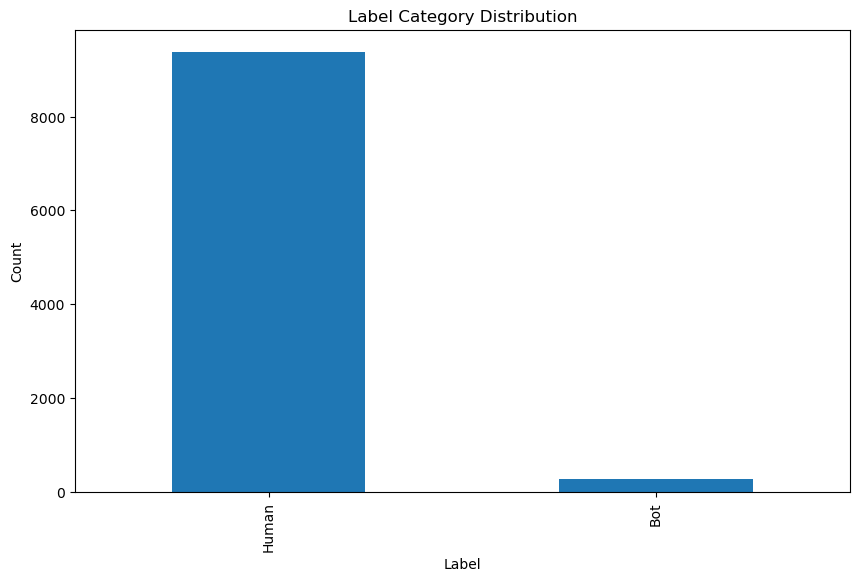

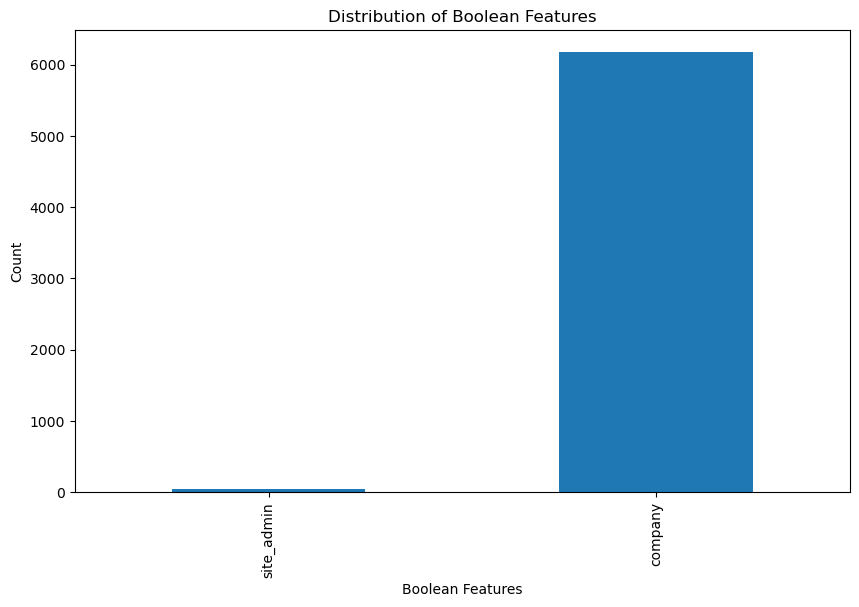

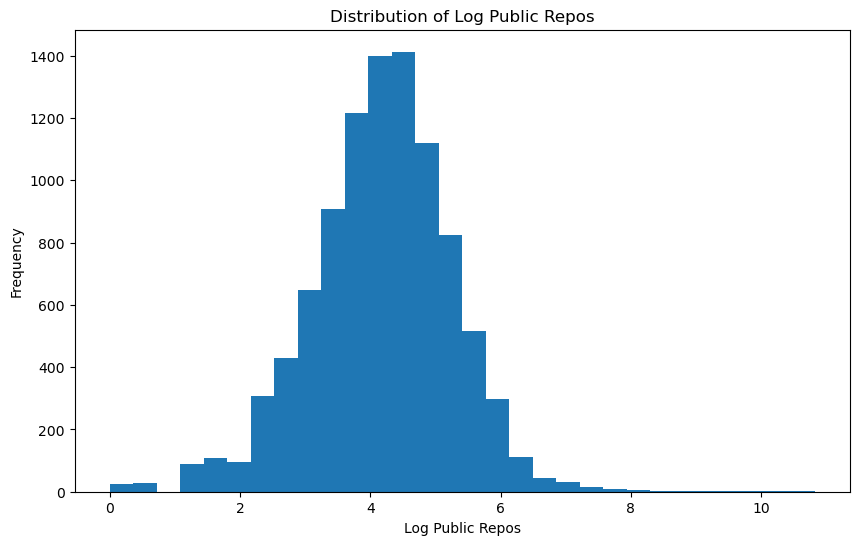

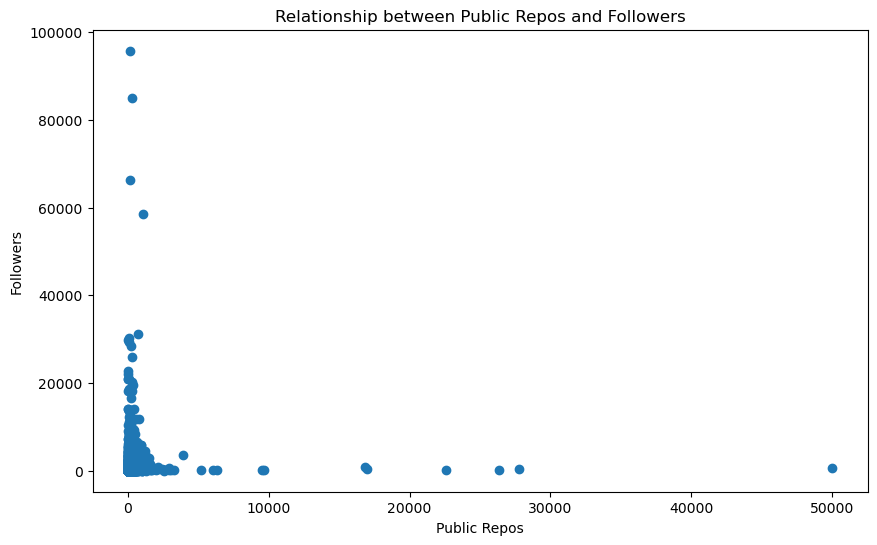

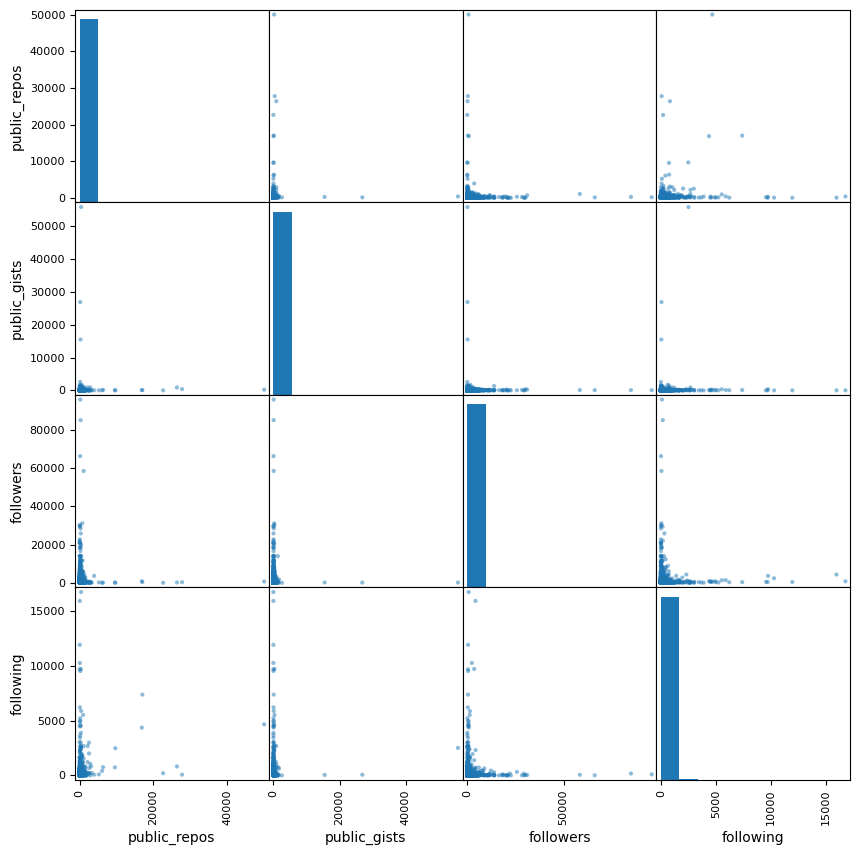

In [12]:
# 绘制条形图：展示label列的类别分布
plt.figure(figsize=(10, 6))
data['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Category Distribution')
plt.show()

# 假设数据中有'site_admin'和'company'两列布尔特征
bool_features = ['site_admin', 'company']
plt.figure(figsize=(10, 6))
data[bool_features].sum().plot(kind='bar', stacked=True)
plt.xlabel('Boolean Features')
plt.ylabel('Count')
plt.title('Distribution of Boolean Features')
plt.show()

# 绘制直方图：展示log_public_repos的对数变换后的数据分布
plt.figure(figsize=(10, 6))
plt.hist(data['log_public_repos'], bins=30)
plt.xlabel('Log Public Repos')
plt.ylabel('Frequency')
plt.title('Distribution of Log Public Repos')
plt.show()

# 绘制散点图：展示public_repos与followers之间的关系
plt.figure(figsize=(10, 6))
plt.scatter(data['public_repos'], data['followers'])
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.title('Relationship between Public Repos and Followers')
plt.show()

# 绘制散点矩阵：展示多个数值型特征之间的成对关系
from pandas.plotting import scatter_matrix
numeric_features = ['public_repos', 'public_gists', 'followers', 'following']
scatter_matrix(data[numeric_features], figsize=(10, 10))
plt.show()

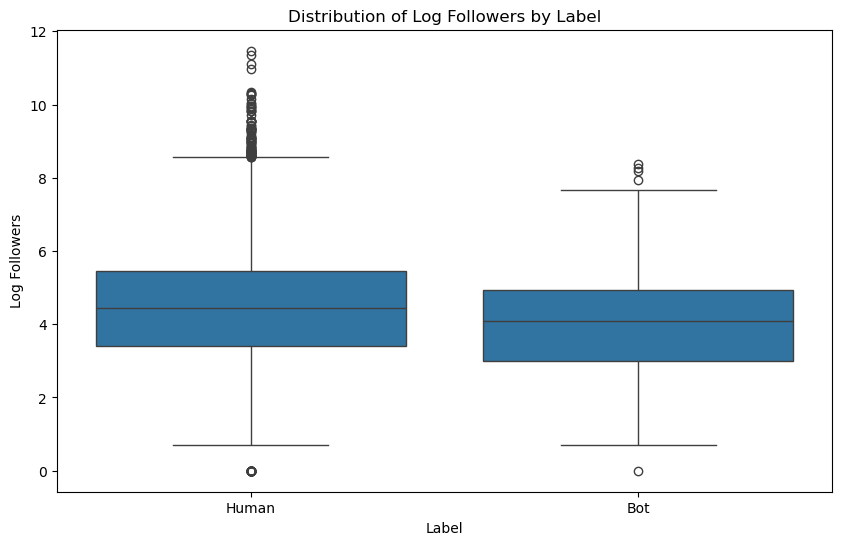

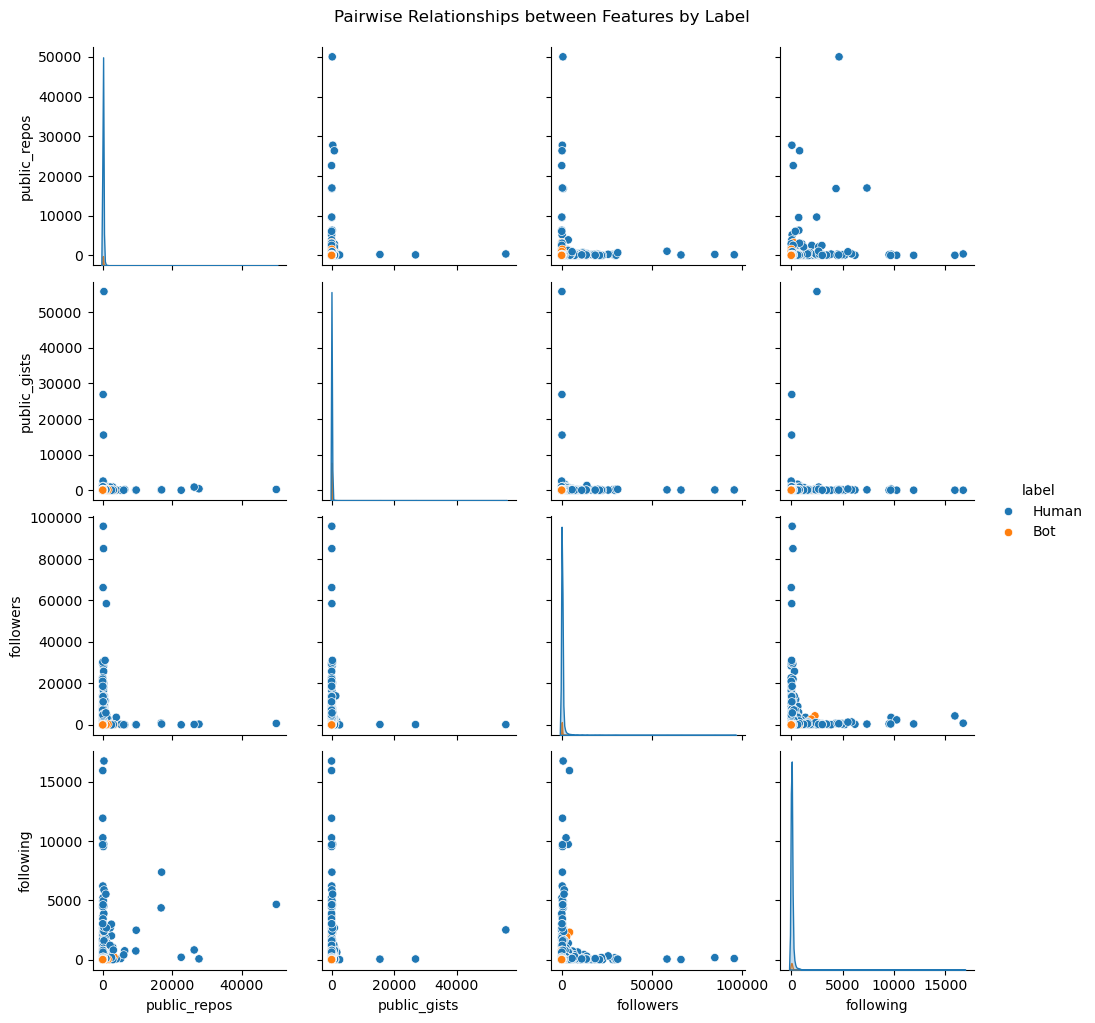

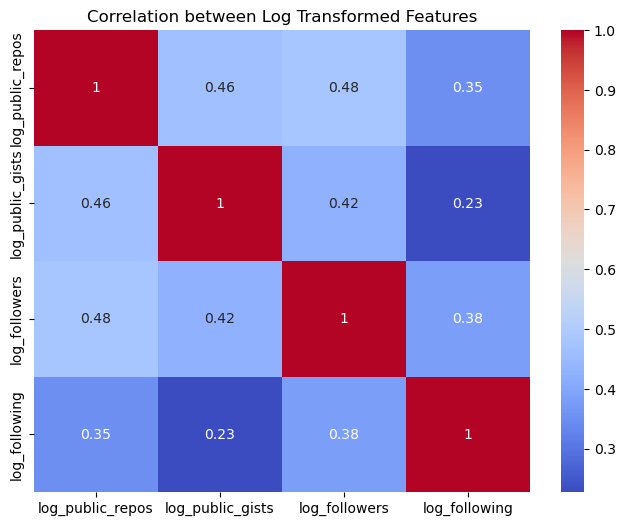

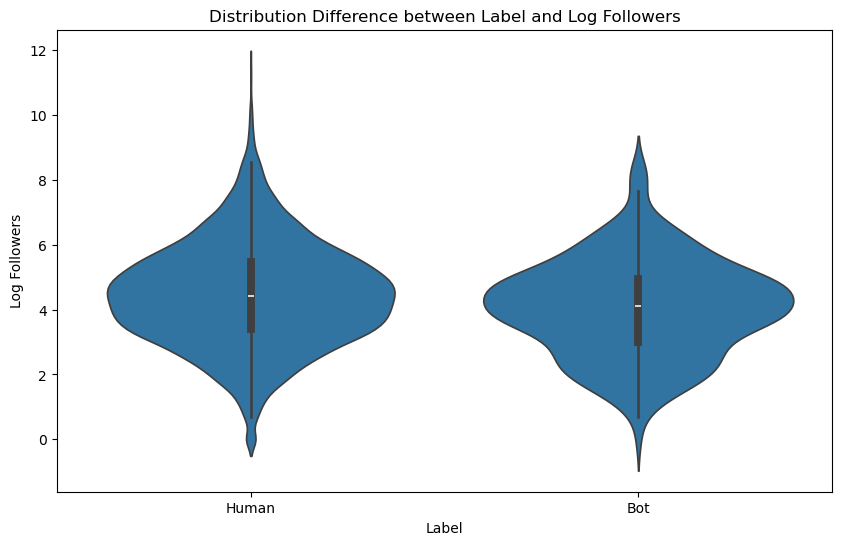

In [10]:
# 绘制箱线图：展示不同label类别下log_followers的分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='log_followers', data=data)
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.title('Distribution of Log Followers by Label')
plt.show()

# 绘制成对图：展示不同特征之间的成对关系，并根据label分类
g = sns.pairplot(data, vars=['public_repos', 'public_gists', 'followers', 'following'], hue='label')
g.fig.suptitle('Pairwise Relationships between Features by Label', y=1.02)
plt.show()

# 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性
correlation_matrix = data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Log Transformed Features')
plt.show()

# 绘制小提琴图：展示label与log_followers之间的分布差异
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='log_followers', data=data)
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.title('Distribution Difference between Label and Log Followers')
plt.show()

In [13]:
# 使用pandas_profiling.ProfileReport()生成交互式数据分析报告
profile = ProfileReport(data, title="GitHub Bot Processed Data Analysis")
profile.to_file("github_bot_data_analysis.html")

NameError: name 'ProfileReport' is not defined